# Data Aquisition & Cleaning - EDA

#### Data pulled:
- Kaggle: https://www.kaggle.com/datasets/josephinelsy/spotify-top-hit-playlist-2010-2022
    * Contains data from 2000 - 2023
- Kaggle: https://www.kaggle.com/datasets/estienneggx/spotify-unpopular-songs?resource=download
- Audio Features: https://developer.spotify.com/documentation/web-api/reference/get-audio-features


##### Import Dependencies and external libraries that will allow the code to function correctly
* pandas = library used for manipulation and analysis of structured data
* numpy = library used for numerical computing and array operations
* plotly.express = library for creating interactive visualizations
* matplotlib.pyplot = library that generates static visualizations like plots and charts
* sklearn.cluster.KMeans = library that performs K-Means clustering, used for unsupervised machine learning
* sklearn.preprocessing.StandardScaler = library that standardizes features by scaling them to have a mean of 0 and a standard deviation of 1
* sklearn.decomposition.PCA = library that reduces dimensionality in datasets while preserving as much variance as possible (Principal Component Analysis)

In [319]:
import os
import numpy as np
import pandas as pd

import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

### Assessing a dataset with audio characteristics of over 4,000 unpopular songs

In [322]:
# Load dataset - Unpopular
unpopular_df = pd.read_csv("../Moody - Project 4/Resources/unpopular_songs.csv")
unpopular_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
2,0.753,0.355,8,-11.799,1,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
3,0.650,0.331,3,-10.818,0,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
4,0.690,0.360,4,-15.624,0,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV


In [324]:
# Inspect Shape - Row/Column Count
unpopular_df.shape

(4073, 17)

In [326]:
# Inspect Column Headers
unpopular_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'explicit', 'popularity', 'track_name', 'track_artist',
       'track_id'],
      dtype='object')

In [328]:
# Inspect Dataframe for Null Values
unpopular_df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_name          0
track_artist        0
track_id            0
dtype: int64

In [330]:
# Removing unnecessary columns
unpopular_df.drop(columns=['track_id', 'mode', 'explicit'], inplace=True)
unpopular_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_name,track_artist
0,0.722,0.476,5,-8.203,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,8,Este Corazón,El Javi
1,0.955,0.281,0,-11.392,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,0,thinking and doing,Br80
2,0.753,0.355,8,-11.799,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,0,Puzzlement,JpThaRuler
3,0.650,0.331,3,-10.818,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,0,Sensi,JpThaRuler
4,0.690,0.360,4,-15.624,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,0,Rass,JpThaRuler


In [332]:
# Inspect Column Headers
unpopular_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'popularity', 'track_name', 'track_artist'],
      dtype='object')

In [334]:
# Adjusting the length of song from ms to minutes
unpopular_df['duration_ms'] = (unpopular_df['duration_ms'] / 60000).round(2)
unpopular_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_name,track_artist
0,0.722,0.476,5,-8.203,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,3.68,8,Este Corazón,El Javi
1,0.955,0.281,0,-11.392,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,2.49,0,thinking and doing,Br80
2,0.753,0.355,8,-11.799,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,2.17,0,Puzzlement,JpThaRuler
3,0.650,0.331,3,-10.818,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,1.94,0,Sensi,JpThaRuler
4,0.690,0.360,4,-15.624,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,1.86,0,Rass,JpThaRuler


In [336]:
# Rename column header for duration from ms to minutes
unpopular_df = unpopular_df.rename(columns={'duration_ms': 'duration_min', 'track_artist': 'artist_name'})
unpopular_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,popularity,track_name,artist_name
0,0.722,0.476,5,-8.203,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,3.68,8,Este Corazón,El Javi
1,0.955,0.281,0,-11.392,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,2.49,0,thinking and doing,Br80
2,0.753,0.355,8,-11.799,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,2.17,0,Puzzlement,JpThaRuler
3,0.650,0.331,3,-10.818,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,1.94,0,Sensi,JpThaRuler
4,0.690,0.360,4,-15.624,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,1.86,0,Rass,JpThaRuler


In [338]:
# Determine the number of unique tracks in the dataset 
unique_tracks = unpopular_df['track_name'].nunique()
unique_tracks

4001

In [340]:
# Removing duplicate entries
unpopular_df = unpopular_df.drop_duplicates(subset='track_name')
unpopular_df.shape

(4001, 14)

In [342]:
unpopular_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,popularity,track_name,artist_name
0,0.722,0.476,5,-8.203,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,3.68,8,Este Corazón,El Javi
1,0.955,0.281,0,-11.392,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,2.49,0,thinking and doing,Br80
2,0.753,0.355,8,-11.799,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,2.17,0,Puzzlement,JpThaRuler
3,0.650,0.331,3,-10.818,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,1.94,0,Sensi,JpThaRuler
4,0.690,0.360,4,-15.624,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,1.86,0,Rass,JpThaRuler


In [344]:
# Create CSV File
unpopular_df.to_csv('../Moody - Project 4/Resources/unpopular_df_file.csv', index=False, header=True)

### Assessing a dataset with the top songs from the years 2000 - 2023

In [347]:
# Load dataset
music_df = pd.read_csv("../Moody - Project 4/Resources/playlist_2010to2023.csv")
music_df.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWV...,2019,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,96,Lover,06HL4z0CvFAxyc27GXpf02,Taylor Swift,['pop'],100,...,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427,4
1,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,96,Lover,06HL4z0CvFAxyc27GXpf02,Taylor Swift,['pop'],100,...,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427,4
2,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,3rUGC1vUpkDG9CZFHMur1t,greedy,96,greedy,45dkTj5sMRSjrmBSBeiHym,Tate McRae,['pop'],85,...,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,131872,1
3,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,2uYWxilOVlUdk4oV9DvwqK,Mitski,"['brooklyn indie', 'pov: indie']",84,...,-14.958,1,0.0321,0.8680,0.135000,0.1580,0.121,113.950,137773,4
4,https://open.spotify.com/playlist/6unJBM7ZGitZ...,2023,4xhsWYTOGcal8zt0J161CU,Lovin On Me,93,Lovin On Me,2LIk90788K0zvyj2JJVwkJ,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,...,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,138411,4


In [349]:
# Inspect Shape - Row/Column Count
music_df.shape

(2400, 23)

In [351]:
# Inspect Column Headers
music_df.columns

Index(['playlist_url', 'year', 'track_id', 'track_name', 'track_popularity',
       'album', 'artist_id', 'artist_name', 'artist_genres',
       'artist_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [353]:
# Inspect Dataframe for Null Values
music_df.isna().sum()

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

### Determined to remove the following columns:
* playlist_url = non-essential information to dataset; url link to access song on Spotify
* track_id = track_name is more important than track_id
* artist_id = artist_name is more important than artist_id
* mode = indicates the  modality (major/minor) of a track; Major = 1 and Minor = 0
* time_signature = notational convention used to specify how many beats are in each bar/measure

In [356]:
# Removing unnecessary columns
music_df.drop(columns=['playlist_url', 'track_id', 'artist_id', 'mode','time_signature'], inplace=True)
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2019,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427
1,2023,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427
2,2023,greedy,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,131872
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,137773
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,138411


In [358]:
# Inspect Column Headers
music_df.columns

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [360]:
# Adjusting the length of song from ms to minutes
music_df['duration_ms'] = (music_df['duration_ms'] / 60000).round(2)
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2019,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
1,2023,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
2,2023,greedy,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


In [362]:
# Rename column header for duration from ms to minutes
music_df = music_df.rename(columns={'duration_ms': 'duration_min'})
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,2019,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
1,2023,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
2,2023,greedy,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


In [364]:
# Determine the number of unique tracks in the dataset 
unique_tracks = music_df['track_name'].nunique()
unique_tracks

2220

In [366]:
# Determine the number of unique genres in the dataset
unique_genres = music_df['artist_genres'].nunique()
unique_genres

718

In [368]:
# Adjust the dataset to sort based on year
df_sorted_year = music_df.sort_values(by='year').groupby('year')
df_sorted_year.head(25) 

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
2098,2000,Thank God I Found You (feat. Joe & 98∞),59,Rainbow,Mariah Carey,"['dance pop', 'pop', 'urban contemporary']",77,0.348,0.532,10,-5.882,0.0331,0.5920,0.000000,0.1060,0.148,129.297,4.29
1618,2000,Sexbomb,67,Reload,Tom Jones,"['adult standards', 'british invasion']",66,0.801,0.876,8,-3.940,0.0446,0.1440,0.000014,0.1040,0.932,122.979,3.53
1619,2000,The Riddle,67,L'Amour Toujours,Gigi D'Agostino,"['eurodance', 'italo dance']",69,0.740,0.876,6,-6.870,0.0369,0.0173,0.001520,0.0785,0.825,127.002,4.76
1316,2000,Can't Fight The Moonlight,70,I Need You,LeAnn Rimes,"['contemporary country', 'country', 'country d...",61,0.628,0.834,6,-6.341,0.0497,0.4030,0.000000,0.0510,0.626,97.865,3.59
1315,2000,My Love,70,Coast To Coast (Expanded Edition),Westlife,['boy band'],69,0.491,0.593,0,-5.975,0.0255,0.0980,0.000000,0.2570,0.328,144.142,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,2023,Mona Lisa (Spider-Man: Across the Spider-Verse),70,Mona Lisa (Spider-Man: Across the Spider-Verse),Dominic Fike,"['alternative pop rock', 'pov: indie']",77,0.759,0.646,1,-7.603,0.1200,0.2310,0.000000,0.1610,0.445,111.043,3.10
2364,2023,Eyes Closed,10,Eyes Closed,Ed Sheeran,"['pop', 'singer-songwriter pop', 'uk pop']",87,0.777,0.526,2,-6.221,0.0645,0.3020,0.000000,0.1050,0.389,107.071,3.25
647,2023,Forget Me,78,Broken By Desire To Be Heavenly Sent,Lewis Capaldi,"['pop', 'uk pop']",81,0.664,0.760,1,-3.769,0.0448,0.3180,0.000000,0.3400,0.700,101.987,3.39
646,2023,Boy's a liar Pt. 2,78,Boy's a liar Pt. 2,PinkPantheress,['bedroom pop'],76,0.696,0.809,5,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,2.18


In [370]:
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,2019,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
1,2023,Cruel Summer,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
2,2023,greedy,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


In [372]:
# Create CSV File
music_df.to_csv('../Moody - Project 4/Resources/musicdf_file.csv', index=False, header=True)

### Music Over Time - WORK ON
* Using the data grouped by year to understand how the overall sound of music has changed from 2000 to 2024

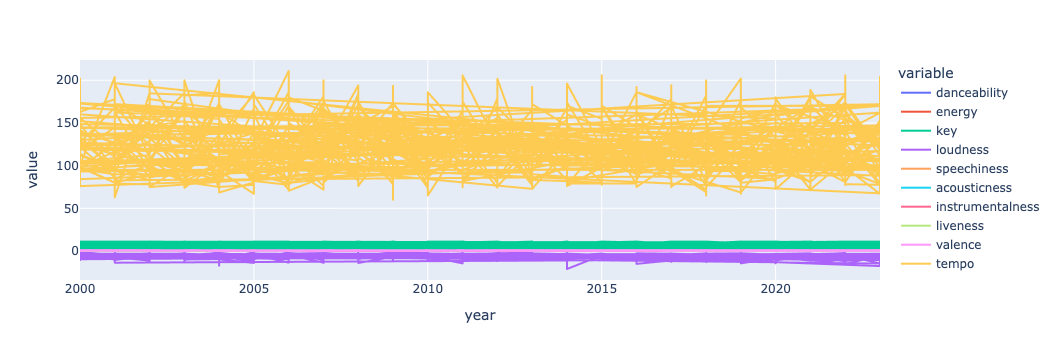

In [129]:
# Display sound features of top songs
sound_features = ['danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']
fig = px.line(music_df, x='year', y=sound_features)
fig.show()

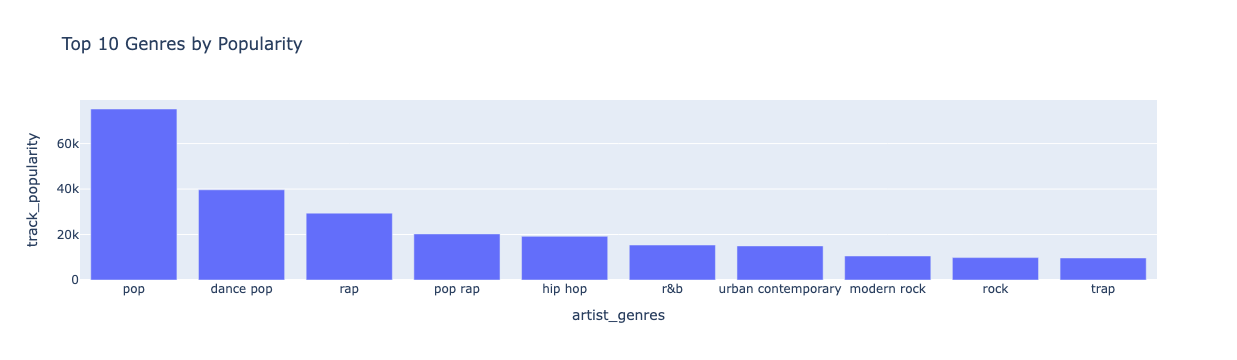

In [376]:
# Convert string representation of lists to actual lists using ast.literal_eval
music_df['artist_genres'] = music_df['artist_genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

# Explode the genres into separate rows
df_exploded = music_df.explode('artist_genres')

# Group by genre and sum the popularity
top_genres = df_exploded.groupby('artist_genres')['track_popularity'].sum().reset_index()

# Sort by popularity
top_genres = top_genres.sort_values(by='track_popularity', ascending=False)

# Get the top 10 genres based on track popularity
top10_genres = top_genres.nlargest(10, 'track_popularity')

# Create a bar plot for the top 10 genres
fig = px.bar(top10_genres, x='artist_genres', y='track_popularity', title='Top 10 Genres by Popularity')
fig.show()

# Deep Learning - Unsupervised

### Clustering Using K-Means - POPULAR SONGS

##### Import Dependencies and external libraries that will allow the code to function correctly
* sklearn.model_selection.train_test_split = library that splits a dataset into training and testing sets, essential for evaluating machine learning models 
* tensorflow = library used in deep learning framework used for building and training neural networks
* pathlib.Path = provides a way to work with file system paths
* ast = The Abstract Syntax Tree module, used to parse and analyze Python code as a tree structure—commonly used for safely evaluating Python expressions from strings

In [449]:
# Import our dependencies
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pathlib import Path
import ast
import hvplot.pandas

In [450]:
# Read the cleaned CSV file into a Pandas DataFrame
# Set the index using the track_name column
new_music_df = pd.read_csv(
    Path("../Moody - Project 4/Resources/musicdf_file.csv"),
    index_col = "track_name"
)

# Review the DataFrame
new_music_df

,year,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
track_name,,,,,,,,,,,,,,,,,
Cruel Summer,2019,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.11700,0.000021,0.1050,0.564,169.994,2.97
Cruel Summer,2023,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.11700,0.000021,0.1050,0.564,169.994,2.97
greedy,2023,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.25600,0.000000,0.1140,0.844,111.018,2.20
My Love Mine All Mine,2023,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.86800,0.135000,0.1580,0.121,113.950,2.30
Lovin On Me,2023,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.00260,0.000002,0.0937,0.606,104.983,2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Butter,2021,0,Butter,BTS,"['k-pop', 'k-pop boy group', 'pop']",87,0.759,0.459,8,-5.187,0.0948,0.00323,0.000000,0.0906,0.695,109.997,2.74
Solar Power,2021,0,Solar Power,Lorde,"['art pop', 'metropopolis', 'nz pop', 'pop']",76,0.735,0.470,4,-9.405,0.1000,0.26600,0.000105,0.3200,0.897,87.971,3.21
Lost Cause,2021,0,Lost Cause,Billie Eilish,"['art pop', 'pop']",89,0.671,0.336,10,-8.494,0.2410,0.70500,0.007510,0.0577,0.518,75.051,3.54


In [451]:
# Determine information on the dataset
new_music_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400 entries, Cruel Summer to Skate
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2400 non-null   int64  
 1   track_popularity   2400 non-null   int64  
 2   album              2400 non-null   object 
 3   artist_name        2400 non-null   object 
 4   artist_genres      2400 non-null   object 
 5   artist_popularity  2400 non-null   int64  
 6   danceability       2400 non-null   float64
 7   energy             2400 non-null   float64
 8   key                2400 non-null   int64  
 9   loudness           2400 non-null   float64
 10  speechiness        2400 non-null   float64
 11  acousticness       2400 non-null   float64
 12  instrumentalness   2400 non-null   float64
 13  liveness           2400 non-null   float64
 14  valence            2400 non-null   float64
 15  tempo              2400 non-null   float64
 16  duration_min     

In [452]:
# Select relevant numerical features 
scaled_features = ['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'valence', \
                   'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']


In [453]:
# Standardize the features for better clustering performance
scaler = StandardScaler()
music_scaled_values = scaler.fit_transform(new_music_df[scaled_features])

In [454]:
music_scaled_df = pd.DataFrame(music_scaled_values,
                               columns=['track_popularity','artist_popularity', 'danceability', 'energy', 'key', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'],
                               index=new_music_df.index)
music_scaled_df.head()

,track_popularity,artist_popularity,danceability,energy,key,valence,tempo,loudness,speechiness,acousticness,instrumentalness,liveness
track_name,,,,,,,,,,,,
Cruel Summer,1.985475,2.007409,-0.782346,0.080424,1.046023,0.122199,1.792605,0.050202,0.632719,-0.227168,-0.162988,-0.521741
Cruel Summer,1.985475,2.007409,-0.782346,0.080424,1.046023,0.122199,1.792605,0.050202,0.632719,-0.227168,-0.162988,-0.521741
greedy,1.985475,0.758891,0.628860,0.267950,0.211800,1.345189,-0.341543,1.261450,-0.708740,0.432895,-0.163238,-0.454639
My Love Mine All Mine,1.831101,0.675656,-1.124457,-2.302965,1.046023,-1.812745,-0.235444,-4.384012,-0.706596,3.339070,1.476168,-0.126586
Lovin On Me,1.753914,0.592422,2.004429,-0.790662,-0.900498,0.305648,-0.559930,0.431742,-0.441735,-0.770414,-0.163212,-0.605990


### Assessing Genres using get_dummies - DISCUSS WITH GROUP

In [462]:
# Convert string representation of lists to actual lists using ast.literal_eval
music_df['artist_genres'] = music_df['artist_genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode the genres into separate rows
df_exploded = music_df.explode('artist_genres')

# Encode the exploded genres to create genre categories
music_df_dummies = pd.get_dummies(df_exploded['artist_genres'])

# Convert the dummies to integer type and display the first few rows
music_df_dummies.astype(int)

,acoustic pop,adult standards,afro r&b,afrobeats,afrofuturism,alabama rap,album rock,alt z,alternative dance,alternative hip hop,...,viral rap,viral trap,virgin islands reggae,virginia hip hop,vocal house,vocal jazz,washington indie,welsh rock,west coast rap,wrestling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Initialize the K-Means model 
* Use the elbow method to find the best value for k using the PCA data - Using range from 1 to 11

In [465]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, random_state=0)

In [467]:
model.fit(music_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [469]:
# Predict the model segments (clusters)
k_3 = model.predict(music_scaled_df)

# View the stock segments
print(k_3)

[0 0 1 ... 2 2 1]


In [471]:
# Create a copy of the DataFrame
music_scaled_predictions_df = music_scaled_df.copy()

# Create a new column in the DataFrame with the predicted clusters
music_scaled_predictions_df["cluster"] = k_3

# Review the DataFrame
music_scaled_predictions_df.head()

,track_popularity,artist_popularity,danceability,energy,key,valence,tempo,loudness,speechiness,acousticness,instrumentalness,liveness,cluster
track_name,,,,,,,,,,,,,
Cruel Summer,1.985475,2.007409,-0.782346,0.080424,1.046023,0.122199,1.792605,0.050202,0.632719,-0.227168,-0.162988,-0.521741,0
Cruel Summer,1.985475,2.007409,-0.782346,0.080424,1.046023,0.122199,1.792605,0.050202,0.632719,-0.227168,-0.162988,-0.521741,0
greedy,1.985475,0.758891,0.628860,0.267950,0.211800,1.345189,-0.341543,1.261450,-0.708740,0.432895,-0.163238,-0.454639,1
My Love Mine All Mine,1.831101,0.675656,-1.124457,-2.302965,1.046023,-1.812745,-0.235444,-4.384012,-0.706596,3.339070,1.476168,-0.126586,2
Lovin On Me,1.753914,0.592422,2.004429,-0.790662,-0.900498,0.305648,-0.559930,0.431742,-0.441735,-0.770414,-0.163212,-0.605990,1


In [503]:
# Create a scatter plot with x="AnnualVariance:,  y="AnnualReturn"
music_scaled_predictions_df.hvplot.scatter(
    x="artist_popularity",
    y="track_popularity",
    by="cluster",
    hover_cols = ["track_name"]
)


:NdOverlay   [cluster]
   :Scatter   [artist_popularity]   (track_popularity,track_name)

### Reduce the number of features to two principal compondents and calculate the variance

In [482]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

In [484]:
# Fit the music_scaled_predictions_df to the PCA
music_pca_data = pca.fit_transform(music_scaled_predictions_df)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
music_pca_data[:5]

array([[-0.23767385,  1.40136014],
       [-0.23767385,  1.40136014],
       [-0.66316911, -0.76371826],
       [ 6.26045565,  1.09386382],
       [ 0.03988194, -1.39616329]])

In [486]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.21039868, 0.12468052])

In [513]:
new_music_df.head()

,year,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
track_name,,,,,,,,,,,,,,,,,
Cruel Summer,2019,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
Cruel Summer,2023,96,Lover,Taylor Swift,['pop'],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
greedy,2023,96,greedy,Tate McRae,['pop'],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
My Love Mine All Mine,2023,94,The Land Is Inhospitable and So Are We,Mitski,"['brooklyn indie', 'pov: indie']",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
Lovin On Me,2023,93,Lovin On Me,Jack Harlow,"['deep underground hip hop', 'kentucky hip hop...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31


In [515]:
# Creating a DataFrame with the PCA data
df_music_pca = pd.DataFrame(music_pca_data, columns=["PC1", "PC2"])

# Copy the tickers names from the original data
df_music_pca["track_name"] = new_music_df.index
# Set the Ticker column as index
df_music_pca = df_music_pca.set_index("track_name")

# Review the DataFrame
df_music_pca.head()

,PC1,PC2
track_name,,
Cruel Summer,-0.237674,1.401360
Cruel Summer,-0.237674,1.401360
greedy,-0.663169,-0.763718
My Love Mine All Mine,6.260456,1.093864
Lovin On Me,0.039882,-1.396163


In [517]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3)

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_music_pca)

# Predict the model segments (clusters)
music_clusters = model.predict(df_music_pca)

# Print the music segments
print(music_clusters)

[0 0 1 ... 2 2 1]


In [519]:
# Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
music_pca_predictions = df_music_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
music_pca_predictions["cluster"] = music_clusters

# Review the DataFrame
music_pca_predictions.head()

,PC1,PC2,cluster
track_name,,,
Cruel Summer,-0.237674,1.401360,0
Cruel Summer,-0.237674,1.401360,0
greedy,-0.663169,-0.763718,1
My Love Mine All Mine,6.260456,1.093864,2
Lovin On Me,0.039882,-1.396163,1


In [521]:
# Create the scatter plot with x="PC1" and y="PC2"
music_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    title = "Scatter Plot by Music Segment - PCA=2"
)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### PCA Benefits
* Using less features allows for reduced dimensionality in datasets while preserving as much variance as possible
* Helps avoid the curse of dimensionality, improving model efficiency
* Lower-dimensional data means faster training for machine learning models
* Removes less significant components (low-variance features), denoising the dataset
* Improves model generalization by reducing overfitting

## Elbow Method - Scaled Data

In [533]:
# Find optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)

for i in k_values:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(music_df_scaled)
    inertia.append(model.inertia_)

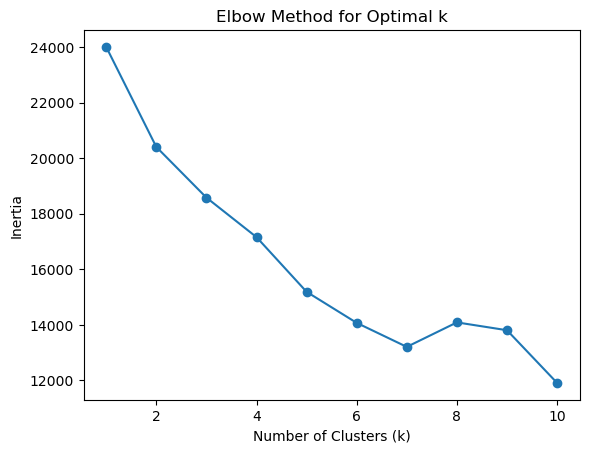

In [535]:
# Plot Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

## Elbow Method - PCA Data

In [543]:
df_music_pca.head()

,PC1,PC2
track_name,,
Cruel Summer,-0.237674,1.401360
Cruel Summer,-0.237674,1.401360
greedy,-0.663169,-0.763718
My Love Mine All Mine,6.260456,1.093864
Lovin On Me,0.039882,-1.396163


In [545]:
# Find optimal number of clusters using Elbow Method
inertia = []
k = range(1, 11)

for i in k:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df_music_pca)
    inertia.append(model.inertia_)

In [547]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [551]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data")
elbow_plot_pca


:Curve   [k]   (inertia)

## Modeling

In [562]:
# Determine the number of unique values in each column.
music_df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,2019,Cruel Summer,96,Lover,Taylor Swift,[pop],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
1,2023,Cruel Summer,96,Lover,Taylor Swift,[pop],100,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,2.97
2,2023,greedy,96,greedy,Tate McRae,[pop],85,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2.20
3,2023,My Love Mine All Mine,94,The Land Is Inhospitable and So Are We,Mitski,"[brooklyn indie, pov: indie]",84,0.504,0.308,9,-14.958,0.0321,0.8680,0.135000,0.1580,0.121,113.950,2.30
4,2023,Lovin On Me,93,Lovin On Me,Jack Harlow,"[deep underground hip hop, kentucky hip hop, p...",83,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2.31
